In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

2022-08-24 15:40:49.945346: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-08-24 15:40:49.945390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pop-os
2022-08-24 15:40:49.945400: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pop-os
2022-08-24 15:40:49.945516: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.141.3
2022-08-24 15:40:49.945545: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.141.3
2022-08-24 15:40:49.945552: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.141.3
2022-08-24 15:40:49.945915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical ope

17225924/17225924 [==============================] - 10s 1us/step


In [5]:
def prepare_image(file):
    img_path = '/home/elifsenakuru/Desktop/data2/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

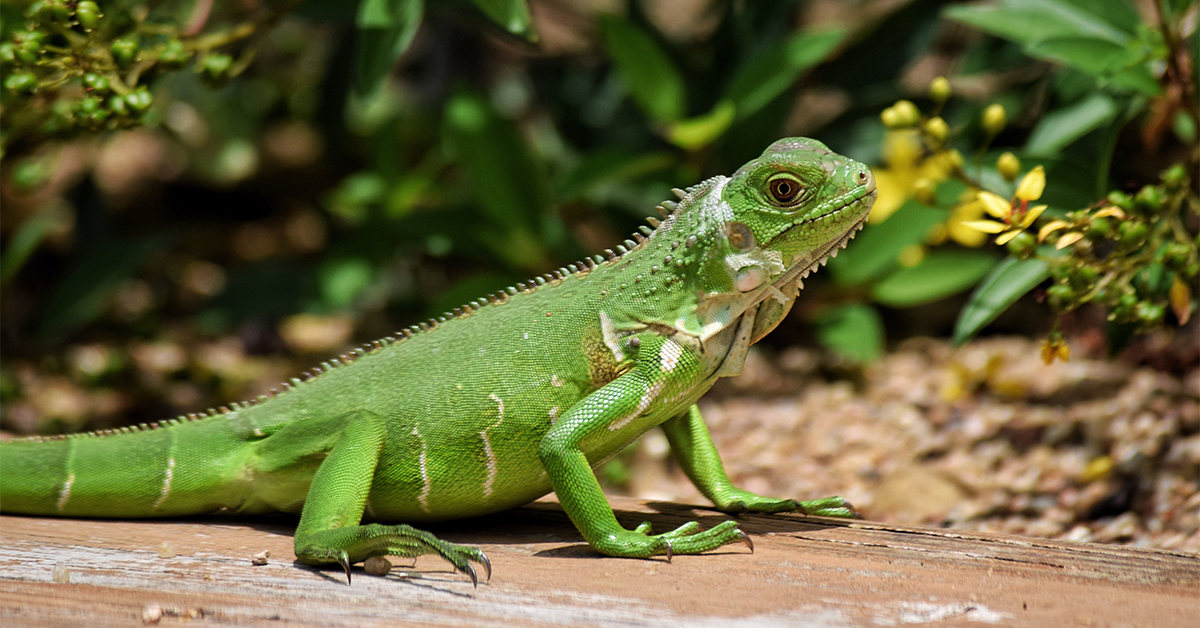

In [6]:
from IPython.display import Image
Image(filename='/home/elifsenakuru/Desktop/data2/MobileNet-samples/1.jpg', width=300,height=200) 

In [7]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 1s 853ms/step


In [8]:
results = imagenet_utils.decode_predictions(predictions)

35363/35363 [==============================] - 0s 4us/step


In [9]:
results


[[('n01693334', 'green_lizard', 0.927185),
  ('n01682714', 'American_chameleon', 0.0406633),
  ('n01677366', 'common_iguana', 0.017758887),
  ('n01694178', 'African_chameleon', 0.012605722),
  ('n01687978', 'agama', 0.0007576002)]]

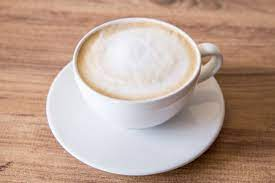

In [10]:
Image(filename='/home/elifsenakuru/Desktop/data2/MobileNet-samples/2.jpg', width=300,height=200)

In [11]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 0s 60ms/step


In [12]:
results = imagenet_utils.decode_predictions(predictions)

In [13]:
results


[[('n07930864', 'cup', 0.63013),
  ('n07932039', 'eggnog', 0.11582643),
  ('n03786901', 'mortar', 0.07338815),
  ('n07920052', 'espresso', 0.059405357),
  ('n07584110', 'consomme', 0.02020701)]]

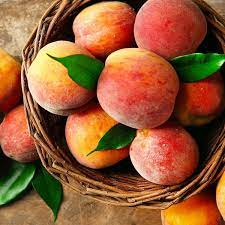

In [14]:
Image(filename='/home/elifsenakuru/Desktop/data2/MobileNet-samples/3.jpg', width=200,height=300)

In [15]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 0s 52ms/step


In [16]:
results = imagenet_utils.decode_predictions(predictions)

In [17]:
results

[[('n07753113', 'fig', 0.4555062),
  ('n07749582', 'lemon', 0.19917022),
  ('n07747607', 'orange', 0.0988887),
  ('n07745940', 'strawberry', 0.09383135),
  ('n07742313', 'Granny_Smith', 0.04945032)]]

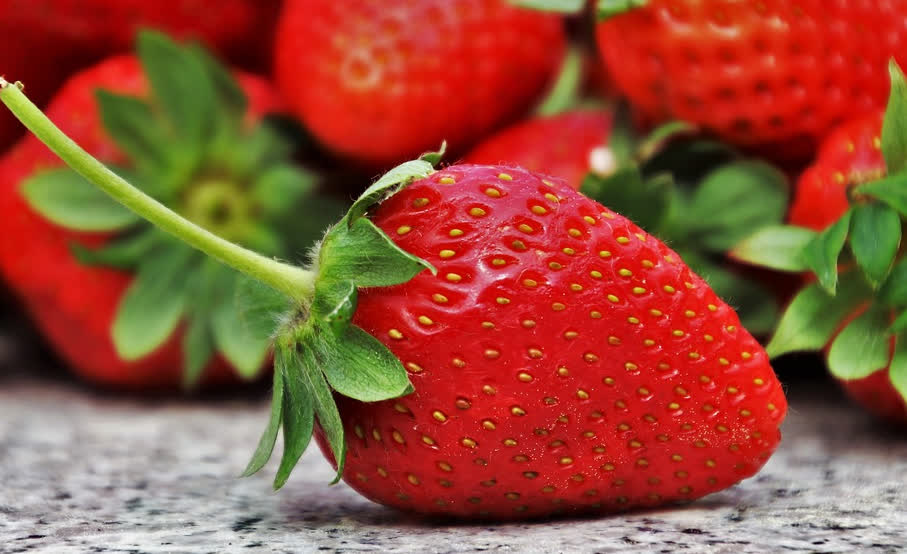

In [18]:
Image(filename='/home/elifsenakuru/Desktop/data2/MobileNet-samples/4.jpg', width=300,height=200)

In [19]:
preprocessed_image = prepare_image('4.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 0s 57ms/step


In [20]:
results = imagenet_utils.decode_predictions(predictions)

In [21]:
results

[[('n07745940', 'strawberry', 0.99999344),
  ('n07749582', 'lemon', 1.2442032e-06),
  ('n07747607', 'orange', 8.602405e-07),
  ('n07753275', 'pineapple', 8.2781474e-07),
  ('n07768694', 'pomegranate', 6.2610275e-07)]]

In [23]:
# Organize data into train, valid, test dirs
os.chdir('/home/elifsenakuru/Desktop/data2/Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [24]:
train_path = '/home/elifsenakuru/Desktop/data2/Dataset/train'
valid_path = '/home/elifsenakuru/Desktop/data2/Dataset/valid'
test_path = '/home/elifsenakuru/Desktop/data2/Dataset/test'

In [25]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224),batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [26]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [27]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [28]:
x = mobile.layers[-5].output

In [30]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)

In [31]:
output = Dense(units=10, activation='softmax')(x)

In [32]:
model = Model(inputs=mobile.input, outputs=output)

In [33]:
for layer in model.layers[:-22]:
    layer.trainable = False

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=5,
            verbose=2
)

Epoch 1/5
172/172 - 115s - loss: 0.0411 - accuracy: 0.9977 - val_loss: 0.0495 - val_accuracy: 0.9933 - 115s/epoch - 666ms/step
Epoch 2/5
172/172 - 87s - loss: 0.0402 - accuracy: 0.9953 - val_loss: 0.0495 - val_accuracy: 0.9833 - 87s/epoch - 505ms/step
Epoch 3/5
172/172 - 78s - loss: 0.0241 - accuracy: 0.9977 - val_loss: 0.0503 - val_accuracy: 0.9967 - 78s/epoch - 453ms/step
Epoch 4/5
172/172 - 74s - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy: 0.9900 - 74s/epoch - 431ms/step
Epoch 5/5
172/172 - 74s - loss: 0.0213 - accuracy: 0.9971 - val_loss: 0.0998 - val_accuracy: 0.9733 - 74s/epoch - 432ms/step


In [38]:
test_labels = test_batches.classes

In [39]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [40]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


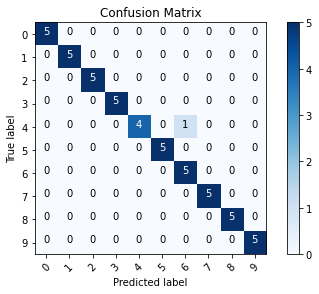

In [44]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')